# Multimodal Sentiments Analysis
I tried to use early fusion tequniques for this task. The image and text were concated and then model was trained to predict various multiclass classification tasks like humour, sarcasm, overall sentiments etc.

In [3]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
data_path = "Multimodal_dataset_assignment3/labels.csv"
image_folder = "Multimodal_dataset_assignment3/images/"


# Load dataset
df = pd.read_csv(data_path)

# Add full image path to dataframe
df["image_path"] = df["image_name"].apply(lambda x: os.path.join(image_folder, x))


In [6]:
df.head()

,Unnamed: 0,image_name,text_ocr,text_corrected,humour,sarcasm,offensive,motivational,overall_sentiment,image_path
0,0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,hilarious,general,not_offensive,not_motivational,very_positive,Multimodal_dataset_assignment3/images/image_1.jpg
1,1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,The best of #10 YearChallenge! Completed in le...,not_funny,general,not_offensive,motivational,very_positive,Multimodal_dataset_assignment3/images/image_2....
2,2,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,Sam Thorne @Strippin ( Follow Follow Saw every...,very_funny,not_sarcastic,not_offensive,not_motivational,positive,Multimodal_dataset_assignment3/images/image_3.JPG
3,3,image_4.png,10 Year Challenge - Sweet Dee Edition,10 Year Challenge - Sweet Dee Edition,very_funny,twisted_meaning,very_offensive,motivational,positive,Multimodal_dataset_assignment3/images/image_4.png
4,4,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,hilarious,very_twisted,very_offensive,not_motivational,neutral,Multimodal_dataset_assignment3/images/image_5.png


In [7]:
print(df.info())     # Checking basic information about the data
df.isnull().sum()    # Checking for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6992 entries, 0 to 6991
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         6992 non-null   int64 
 1   image_name         6992 non-null   object
 2   text_ocr           6831 non-null   object
 3   text_corrected     6987 non-null   object
 4   humour             6992 non-null   object
 5   sarcasm            6992 non-null   object
 6   offensive          6992 non-null   object
 7   motivational       6992 non-null   object
 8   overall_sentiment  6992 non-null   object
 9   image_path         6992 non-null   object
dtypes: int64(1), object(9)
memory usage: 546.4+ KB
None


Unnamed: 0             0
image_name             0
text_ocr             161
text_corrected         5
humour                 0
sarcasm                0
offensive              0
motivational           0
overall_sentiment      0
image_path             0
dtype: int64

In [8]:
df.dropna(inplace=True)      # Dropping null values

In [9]:
print(df['humour'].value_counts())
print(df['sarcasm'].value_counts())
print(df['offensive'].value_counts())
print(df['motivational'].value_counts())
print(df['overall_sentiment'].value_counts())   # Checking for any imbalance in Data

humour
funny         2394
very_funny    2176
not_funny     1618
hilarious      642
Name: count, dtype: int64
sarcasm
general            3430
not_sarcastic      1516
twisted_meaning    1499
very_twisted        385
Name: count, dtype: int64
offensive
not_offensive        2657
slight               2536
very_offensive       1424
hateful_offensive     213
Name: count, dtype: int64
motivational
not_motivational    4421
motivational        2409
Name: count, dtype: int64
overall_sentiment
positive         3057
neutral          2157
very_positive    1001
negative          469
very_negative     146
Name: count, dtype: int64


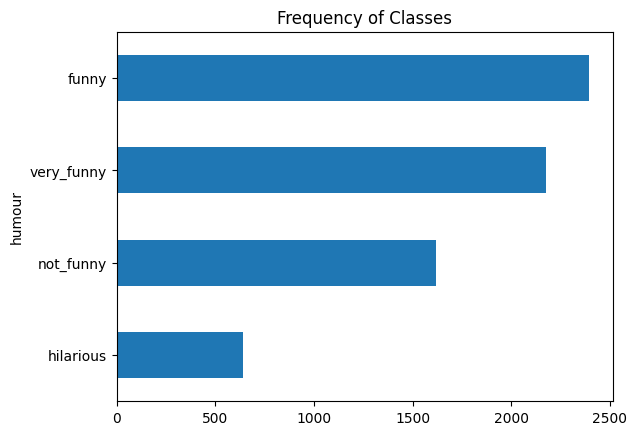

In [10]:
label_counts = df['humour'].value_counts(ascending=True)
label_counts.plot.barh()
plt.title("Frequency of Classes")
plt.show()

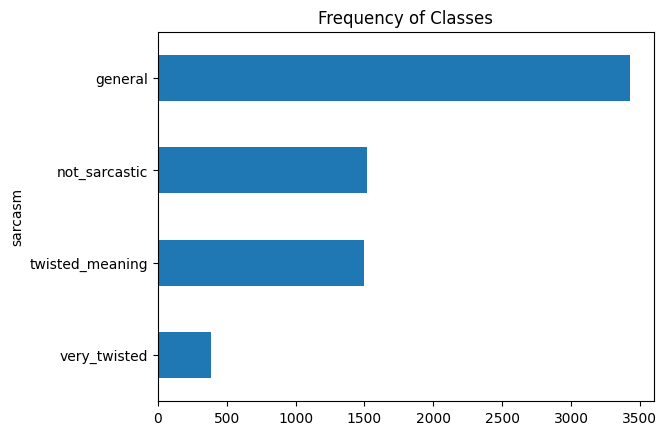

In [11]:
label_counts = df['sarcasm'].value_counts(ascending=True)
label_counts.plot.barh()
plt.title("Frequency of Classes")
plt.show()

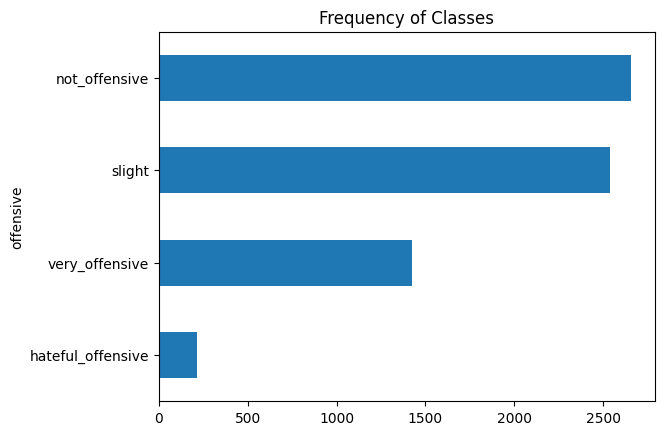

In [12]:
label_counts = df['offensive'].value_counts(ascending=True)
label_counts.plot.barh()
plt.title("Frequency of Classes")
plt.show()

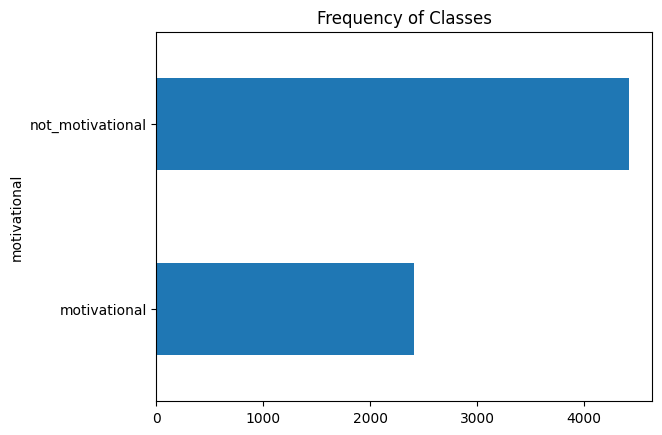

In [13]:
label_counts = df['motivational'].value_counts(ascending=True)
label_counts.plot.barh()
plt.title("Frequency of Classes")
plt.show()

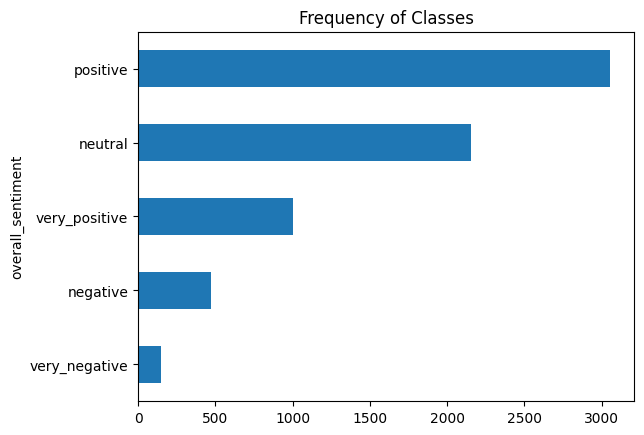

In [14]:
label_counts = df['overall_sentiment'].value_counts(ascending=True)
label_counts.plot.barh()
plt.title("Frequency of Classes")
plt.show()

In [15]:
# Defining mappings for categorical labels
humour_map = {'not_funny': 0, 'funny': 1, 'very_funny': 2, 'hilarious': 3}
sarcasm_map = {'not_sarcastic': 0, 'general': 1, 'twisted_meaning': 2, 'very_twisted': 3}
offensive_map = {'not_offensive': 0, 'slight': 1, 'very_offensive': 2, 'hateful_offensive': 3}
motivational_map = {'not_motivational': 0, 'motivational': 1}
sentiment_map = {'very_negative': 0, 'negative': 1, 'neutral': 2, 'positive': 3, 'very_positive': 4}

# Applying mappings
df["humour"] = df["humour"].map(humour_map)
df["sarcasm"] = df["sarcasm"].map(sarcasm_map)
df["offensive"] = df["offensive"].map(offensive_map)
df["motivational"] = df["motivational"].map(motivational_map)
df["overall_sentiment"] = df["overall_sentiment"].map(sentiment_map)

# Convertings labels to integer type
label_columns = ["humour", "sarcasm", "offensive", "motivational", "overall_sentiment"]
df[label_columns] = df[label_columns].astype(int)

In [16]:
df.head()

,Unnamed: 0,image_name,text_ocr,text_corrected,humour,sarcasm,offensive,motivational,overall_sentiment,image_path
0,0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,3,1,0,0,4,Multimodal_dataset_assignment3/images/image_1.jpg
1,1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,The best of #10 YearChallenge! Completed in le...,0,1,0,1,4,Multimodal_dataset_assignment3/images/image_2....
2,2,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,Sam Thorne @Strippin ( Follow Follow Saw every...,2,0,0,0,3,Multimodal_dataset_assignment3/images/image_3.JPG
3,3,image_4.png,10 Year Challenge - Sweet Dee Edition,10 Year Challenge - Sweet Dee Edition,2,2,2,1,3,Multimodal_dataset_assignment3/images/image_4.png
4,4,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,3,3,2,0,2,Multimodal_dataset_assignment3/images/image_5.png


<Axes: title={'center': 'Words per Review'}, xlabel='overall_sentiment'>

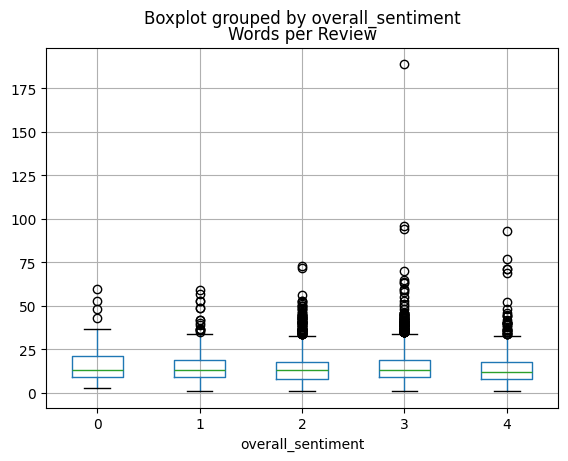

In [17]:
df['Words per Review'] = df['text_corrected'].str.split().apply(len)          # Checking words per review in the dataset.
df.boxplot("Words per Review", by="overall_sentiment")

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, models
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModel
from PIL import Image
from sklearn.model_selection import train_test_split


/home/vishesh/anaconda3/envs/torchbase/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
# Spliting dataset into train and validation sets
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

In [20]:
class MemotionDataset(Dataset):                                 # A Custom Dataset designed for handling multimodal dataset where each sample consists of text and image
    def __init__(self, dataframe, tokenizer, transform=None):
        self.dataframe = dataframe
        self.tokenizer = tokenizer
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        text = row["text_corrected"]
        image_path = row["image_path"]
        labels = torch.tensor(row[["humour", "sarcasm", "offensive", "motivational", "overall_sentiment"]].astype(int).values, dtype=torch.long)


        # Load and transform image
        image = Image.open(image_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        # Tokenize text
        encoded_text = self.tokenizer(text, padding="max_length", truncation=True, return_tensors="pt")

        return {
            "input_ids": encoded_text["input_ids"].squeeze(),
            "attention_mask": encoded_text["attention_mask"].squeeze(),
            "image": image,
            "labels": labels
        }



In [21]:
# Image transformations
image_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Loading tokenizer for text processing
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [22]:
# Creating datasets
train_dataset = MemotionDataset(train_df, tokenizer, transform=image_transform)
test_dataset = MemotionDataset(test_df, tokenizer, transform=image_transform)

# Creating dataloaders
batch_size = 32
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)



In [23]:
class MultimodalModel(nn.Module):
    def __init__(self, num_classes_list):
        super(MultimodalModel, self).__init__()

        # Text Model (DISTILBERT)
        self.text_encoder = AutoModel.from_pretrained("distilbert-base-uncased")
        self.text_fc = nn.Linear(768, 128)  # Reducing BERT output to 128-dim

        # Image Model (ResNet-18)
        self.resnet = models.resnet18(pretrained=True)
        self.resnet.fc = nn.Linear(self.resnet.fc.in_features, 128)  # Modifying ResNet FC layer

        # Fusion and classification layers for each task
        self.fc_humour = nn.Linear(256, num_classes_list[0])
        self.fc_sarcasm = nn.Linear(256, num_classes_list[1])
        self.fc_offensive = nn.Linear(256, num_classes_list[2])
        self.fc_motivational = nn.Linear(256, num_classes_list[3])
        self.fc_sentiment = nn.Linear(256, num_classes_list[4])

    def forward(self, text_inputs, image):
        # Processing text
        text_output = self.text_encoder(input_ids=text_inputs["input_ids"], attention_mask=text_inputs["attention_mask"]).last_hidden_state[:, 0, :]
        text_features = self.text_fc(text_output)

        # Processing imageAutoModel.from_pretrained("distilbert-base-uncased")
        image_features = self.resnet(image)

        # Concatenating text and image features
        fused_features = torch.cat((text_features, image_features), dim=1)

        # Predictions for each task
        humour = self.fc_humour(fused_features)
        sarcasm = self.fc_sarcasm(fused_features)
        offensive = self.fc_offensive(fused_features)
        motivational = self.fc_motivational(fused_features)
        sentiment = self.fc_sentiment(fused_features)

        return humour, sarcasm, offensive, motivational, sentiment




In [26]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [34]:
# Moving model to device

model = MultimodalModel(num_classes_list=[4, 4, 4, 2, 5]).to(device)  # Adjust for each label category

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Training Loop with Batch-wise Validation Loss
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    
    for batch in train_dataloader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        images = batch["image"].to(device)
        labels = batch["labels"].to(device)

        # Forward pass shared layers once
        text_inputs = {"input_ids": input_ids, "attention_mask": attention_mask}
        with torch.no_grad():
            text_output = model.text_encoder(**text_inputs).last_hidden_state[:, 0, :]
            text_features = model.text_fc(text_output)
            image_features = model.resnet(images)
            fused_features = torch.cat((text_features, image_features), dim=1)

        # Clone fused features so each task gets independent input
        fused_features = fused_features.detach()

        # --- Task: Humour ---
        model.zero_grad()
        humour_out = model.fc_humour(fused_features)
        loss_humour = criterion(humour_out, labels[:, 0])
        loss_humour.backward()
        optimizer.step()

        # --- Task: Sarcasm ---
        model.zero_grad()
        sarcasm_out = model.fc_sarcasm(fused_features)
        loss_sarcasm = criterion(sarcasm_out, labels[:, 1])
        loss_sarcasm.backward()
        optimizer.step()

        # --- Task: Offensive ---
        model.zero_grad()
        offensive_out = model.fc_offensive(fused_features)
        loss_offensive = criterion(offensive_out, labels[:, 2])
        loss_offensive.backward()
        optimizer.step()

        # --- Task: Motivational ---
        model.zero_grad()
        motivational_out = model.fc_motivational(fused_features)
        loss_motivational = criterion(motivational_out, labels[:, 3])
        loss_motivational.backward()
        optimizer.step()

        # --- Task: Sentiment ---
        model.zero_grad()
        sentiment_out = model.fc_sentiment(fused_features)
        loss_sentiment = criterion(sentiment_out, labels[:, 4])
        loss_sentiment.backward()
        optimizer.step()

        total_loss = (loss_humour + loss_sarcasm + loss_offensive + loss_motivational + loss_sentiment) / 5


        total_train_loss += total_loss.item()

        print(f"Epoch {epoch+1}, Batch Loss: {total_loss.item():.4f}")

    print(f"Epoch {epoch+1} Finished, Train Loss: {total_train_loss/len(train_dataloader):.4f}")



/home/vishesh/anaconda3/envs/torchbase/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/vishesh/anaconda3/envs/torchbase/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1, Batch Loss: 1.2916
Epoch 1, Batch Loss: 1.2804
Epoch 1, Batch Loss: 1.2543


/home/vishesh/anaconda3/envs/torchbase/lib/python3.12/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1, Batch Loss: 1.2464
Epoch 1, Batch Loss: 1.2044
Epoch 1, Batch Loss: 1.1699
Epoch 1, Batch Loss: 1.2024
Epoch 1, Batch Loss: 1.1484
Epoch 1, Batch Loss: 1.1978
Epoch 1, Batch Loss: 1.2395
Epoch 1, Batch Loss: 1.1686
Epoch 1, Batch Loss: 1.1174
Epoch 1, Batch Loss: 1.1136
Epoch 1, Batch Loss: 1.1207
Epoch 1, Batch Loss: 1.1198
Epoch 1, Batch Loss: 1.2226
Epoch 1, Batch Loss: 1.3280
Epoch 1, Batch Loss: 1.1234
Epoch 1, Batch Loss: 1.1126
Epoch 1, Batch Loss: 1.0937
Epoch 1, Batch Loss: 1.1267
Epoch 1, Batch Loss: 1.2302
Epoch 1, Batch Loss: 1.1550
Epoch 1, Batch Loss: 1.1018
Epoch 1, Batch Loss: 1.0738
Epoch 1, Batch Loss: 1.1771
Epoch 1, Batch Loss: 1.1225
Epoch 1, Batch Loss: 1.1430
Epoch 1, Batch Loss: 1.0724
Epoch 1, Batch Loss: 1.1488
Epoch 1, Batch Loss: 1.1146
Epoch 1, Batch Loss: 1.1079
Epoch 1, Batch Loss: 1.1727
Epoch 1, Batch Loss: 1.1504
Epoch 1, Batch Loss: 1.1502
Epoch 1, Batch Loss: 1.1502
Epoch 1, Batch Loss: 1.1297
Epoch 1, Batch Loss: 0.9933
Epoch 1, Batch Loss:

/home/vishesh/anaconda3/envs/torchbase/lib/python3.12/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1, Batch Loss: 1.1933
Epoch 1, Batch Loss: 1.1050
Epoch 1, Batch Loss: 1.0940
Epoch 1, Batch Loss: 1.1827
Epoch 1, Batch Loss: 1.1225
Epoch 1, Batch Loss: 1.0649
Epoch 1, Batch Loss: 1.1262
Epoch 1, Batch Loss: 1.1333
Epoch 1, Batch Loss: 1.1722
Epoch 1, Batch Loss: 1.0673
Epoch 1, Batch Loss: 1.0963
Epoch 1, Batch Loss: 1.1432
Epoch 1, Batch Loss: 1.1900
Epoch 1, Batch Loss: 1.1783
Epoch 1, Batch Loss: 1.1642
Epoch 1, Batch Loss: 1.1166
Epoch 1, Batch Loss: 1.1215
Epoch 1, Batch Loss: 1.1354
Epoch 1, Batch Loss: 1.1425
Epoch 1, Batch Loss: 1.0723
Epoch 1, Batch Loss: 1.0766
Epoch 1, Batch Loss: 1.1038
Epoch 1, Batch Loss: 1.0093
Epoch 1 Finished, Train Loss: 1.1326
Epoch 2, Batch Loss: 1.0798
Epoch 2, Batch Loss: 1.1210
Epoch 2, Batch Loss: 1.0428
Epoch 2, Batch Loss: 1.0994
Epoch 2, Batch Loss: 1.1636
Epoch 2, Batch Loss: 1.1416
Epoch 2, Batch Loss: 1.2104
Epoch 2, Batch Loss: 1.0605
Epoch 2, Batch Loss: 1.1784
Epoch 2, Batch Loss: 1.0873
Epoch 2, Batch Loss: 1.1233
Epoch 2, Ba

/home/vishesh/anaconda3/envs/torchbase/lib/python3.12/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 2, Batch Loss: 1.1149
Epoch 2, Batch Loss: 1.1148
Epoch 2, Batch Loss: 1.1718
Epoch 2, Batch Loss: 1.0619
Epoch 2, Batch Loss: 1.1368
Epoch 2, Batch Loss: 1.1551
Epoch 2, Batch Loss: 1.0656
Epoch 2, Batch Loss: 1.0973
Epoch 2, Batch Loss: 1.0625
Epoch 2, Batch Loss: 1.0909
Epoch 2, Batch Loss: 1.1867
Epoch 2, Batch Loss: 1.1226
Epoch 2, Batch Loss: 1.1488
Epoch 2, Batch Loss: 1.0969
Epoch 2, Batch Loss: 1.1489
Epoch 2, Batch Loss: 1.1093
Epoch 2, Batch Loss: 1.1877
Epoch 2, Batch Loss: 1.0909
Epoch 2, Batch Loss: 1.1775
Epoch 2, Batch Loss: 1.0639
Epoch 2, Batch Loss: 1.0854
Epoch 2, Batch Loss: 1.1588
Epoch 2, Batch Loss: 1.1798
Epoch 2, Batch Loss: 1.0992
Epoch 2, Batch Loss: 1.0610
Epoch 2, Batch Loss: 1.0652
Epoch 2, Batch Loss: 1.0549
Epoch 2, Batch Loss: 1.1062
Epoch 2, Batch Loss: 1.1165
Epoch 2, Batch Loss: 1.1879
Epoch 2, Batch Loss: 1.0575
Epoch 2, Batch Loss: 1.1205
Epoch 2, Batch Loss: 1.0989
Epoch 2, Batch Loss: 1.0810
Epoch 2, Batch Loss: 1.1547


/home/vishesh/anaconda3/envs/torchbase/lib/python3.12/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 2, Batch Loss: 1.1126
Epoch 2, Batch Loss: 1.1885
Epoch 2, Batch Loss: 1.1314
Epoch 2, Batch Loss: 1.1596
Epoch 2, Batch Loss: 1.1117
Epoch 2, Batch Loss: 1.1639
Epoch 2, Batch Loss: 1.1881
Epoch 2, Batch Loss: 1.0565
Epoch 2, Batch Loss: 1.1669
Epoch 2, Batch Loss: 1.1725
Epoch 2, Batch Loss: 1.0808
Epoch 2, Batch Loss: 1.0875
Epoch 2, Batch Loss: 1.1666
Epoch 2, Batch Loss: 1.1077
Epoch 2, Batch Loss: 1.1150
Epoch 2, Batch Loss: 1.0894
Epoch 2, Batch Loss: 1.2027
Epoch 2, Batch Loss: 1.1160
Epoch 2, Batch Loss: 1.1736
Epoch 2, Batch Loss: 1.1558
Epoch 2, Batch Loss: 1.1542
Epoch 2, Batch Loss: 1.1870
Epoch 2, Batch Loss: 1.0986
Epoch 2, Batch Loss: 1.0941
Epoch 2, Batch Loss: 1.0502
Epoch 2, Batch Loss: 1.0726
Epoch 2, Batch Loss: 1.1715
Epoch 2, Batch Loss: 1.1387
Epoch 2, Batch Loss: 1.1518
Epoch 2, Batch Loss: 1.1115
Epoch 2, Batch Loss: 1.0304
Epoch 2, Batch Loss: 1.0940
Epoch 2, Batch Loss: 1.1215
Epoch 2, Batch Loss: 1.0821
Epoch 2, Batch Loss: 1.0977
Epoch 2, Batch Loss:

/home/vishesh/anaconda3/envs/torchbase/lib/python3.12/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 3, Batch Loss: 1.0842
Epoch 3, Batch Loss: 1.2397
Epoch 3, Batch Loss: 1.0712
Epoch 3, Batch Loss: 1.1042
Epoch 3, Batch Loss: 1.1153
Epoch 3, Batch Loss: 1.1878
Epoch 3, Batch Loss: 1.1167
Epoch 3, Batch Loss: 1.0614
Epoch 3, Batch Loss: 1.1401
Epoch 3, Batch Loss: 1.0749
Epoch 3, Batch Loss: 1.1297
Epoch 3, Batch Loss: 1.0840
Epoch 3, Batch Loss: 1.0558
Epoch 3, Batch Loss: 1.0080
Epoch 3, Batch Loss: 1.0465
Epoch 3, Batch Loss: 1.1557
Epoch 3, Batch Loss: 1.2265
Epoch 3, Batch Loss: 1.1129
Epoch 3, Batch Loss: 1.1181
Epoch 3, Batch Loss: 1.1275
Epoch 3, Batch Loss: 1.1159
Epoch 3, Batch Loss: 1.0657
Epoch 3, Batch Loss: 1.1785
Epoch 3, Batch Loss: 1.0637
Epoch 3, Batch Loss: 1.0773
Epoch 3, Batch Loss: 1.1108
Epoch 3, Batch Loss: 1.1281
Epoch 3, Batch Loss: 1.1977
Epoch 3, Batch Loss: 1.1197
Epoch 3, Batch Loss: 1.0849
Epoch 3, Batch Loss: 1.1306
Epoch 3, Batch Loss: 1.1121
Epoch 3, Batch Loss: 1.1324
Epoch 3, Batch Loss: 1.1074
Epoch 3, Batch Loss: 1.1216
Epoch 3, Batch Loss:

/home/vishesh/anaconda3/envs/torchbase/lib/python3.12/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 3, Batch Loss: 1.0759
Epoch 3, Batch Loss: 1.0946
Epoch 3 Finished, Train Loss: 1.1131
Epoch 4, Batch Loss: 1.0902
Epoch 4, Batch Loss: 1.1046
Epoch 4, Batch Loss: 1.0301
Epoch 4, Batch Loss: 1.0089
Epoch 4, Batch Loss: 1.1176
Epoch 4, Batch Loss: 1.0514
Epoch 4, Batch Loss: 1.1719
Epoch 4, Batch Loss: 1.0088
Epoch 4, Batch Loss: 1.1307
Epoch 4, Batch Loss: 1.1285
Epoch 4, Batch Loss: 1.1420
Epoch 4, Batch Loss: 1.1505
Epoch 4, Batch Loss: 1.1215
Epoch 4, Batch Loss: 1.1526
Epoch 4, Batch Loss: 1.0474
Epoch 4, Batch Loss: 1.0337
Epoch 4, Batch Loss: 1.0956
Epoch 4, Batch Loss: 1.1595
Epoch 4, Batch Loss: 1.0900
Epoch 4, Batch Loss: 1.0991
Epoch 4, Batch Loss: 1.0794
Epoch 4, Batch Loss: 1.1307
Epoch 4, Batch Loss: 1.1603
Epoch 4, Batch Loss: 1.1937
Epoch 4, Batch Loss: 1.0925
Epoch 4, Batch Loss: 1.0709
Epoch 4, Batch Loss: 1.1472
Epoch 4, Batch Loss: 1.1487
Epoch 4, Batch Loss: 1.2175
Epoch 4, Batch Loss: 1.0775
Epoch 4, Batch Loss: 1.0983
Epoch 4, Batch Loss: 1.1655
Epoch 4, Ba

/home/vishesh/anaconda3/envs/torchbase/lib/python3.12/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 4, Batch Loss: 1.0642
Epoch 4, Batch Loss: 1.1022
Epoch 4, Batch Loss: 1.0379
Epoch 4, Batch Loss: 1.1727
Epoch 4, Batch Loss: 1.1622
Epoch 4, Batch Loss: 1.1359
Epoch 4, Batch Loss: 1.1659
Epoch 4, Batch Loss: 1.0590
Epoch 4, Batch Loss: 1.1807
Epoch 4, Batch Loss: 1.1671
Epoch 4, Batch Loss: 1.0606
Epoch 4, Batch Loss: 1.1036
Epoch 4, Batch Loss: 1.1962
Epoch 4, Batch Loss: 1.0884
Epoch 4, Batch Loss: 1.0670
Epoch 4, Batch Loss: 1.0495
Epoch 4, Batch Loss: 1.0893
Epoch 4, Batch Loss: 1.1150
Epoch 4, Batch Loss: 1.1213
Epoch 4, Batch Loss: 1.0761
Epoch 4, Batch Loss: 1.1676
Epoch 4, Batch Loss: 1.1552
Epoch 4, Batch Loss: 1.0935
Epoch 4, Batch Loss: 1.1175
Epoch 4, Batch Loss: 1.1397
Epoch 4, Batch Loss: 1.0974
Epoch 4, Batch Loss: 1.0875
Epoch 4, Batch Loss: 1.1877
Epoch 4, Batch Loss: 1.1255
Epoch 4, Batch Loss: 1.1038
Epoch 4, Batch Loss: 1.1286
Epoch 4, Batch Loss: 1.1024
Epoch 4, Batch Loss: 1.1771
Epoch 4, Batch Loss: 1.0587
Epoch 4, Batch Loss: 1.0886
Epoch 4, Batch Loss:

/home/vishesh/anaconda3/envs/torchbase/lib/python3.12/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 4, Batch Loss: 1.1050
Epoch 4, Batch Loss: 1.2672
Epoch 4, Batch Loss: 1.1389
Epoch 4, Batch Loss: 1.1325
Epoch 4, Batch Loss: 1.1264
Epoch 4, Batch Loss: 1.0815
Epoch 4, Batch Loss: 1.1047
Epoch 4, Batch Loss: 1.0981
Epoch 4, Batch Loss: 1.1087
Epoch 4, Batch Loss: 1.1489
Epoch 4, Batch Loss: 1.0520
Epoch 4, Batch Loss: 1.1478
Epoch 4, Batch Loss: 1.1129
Epoch 4, Batch Loss: 1.1735
Epoch 4, Batch Loss: 1.1411
Epoch 4, Batch Loss: 1.2216
Epoch 4, Batch Loss: 1.0737
Epoch 4, Batch Loss: 1.1043
Epoch 4, Batch Loss: 1.1101
Epoch 4, Batch Loss: 1.1120
Epoch 4, Batch Loss: 1.1528
Epoch 4, Batch Loss: 1.0481
Epoch 4, Batch Loss: 1.0719
Epoch 4, Batch Loss: 1.1043
Epoch 4 Finished, Train Loss: 1.1094
Epoch 5, Batch Loss: 1.1318
Epoch 5, Batch Loss: 1.1635
Epoch 5, Batch Loss: 1.1109
Epoch 5, Batch Loss: 1.0610
Epoch 5, Batch Loss: 1.1128
Epoch 5, Batch Loss: 1.2089
Epoch 5, Batch Loss: 1.0980
Epoch 5, Batch Loss: 1.1493
Epoch 5, Batch Loss: 1.1313
Epoch 5, Batch Loss: 1.1120
Epoch 5, Ba

/home/vishesh/anaconda3/envs/torchbase/lib/python3.12/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 5, Batch Loss: 1.1081
Epoch 5, Batch Loss: 1.1290
Epoch 5, Batch Loss: 1.0873
Epoch 5, Batch Loss: 1.0974
Epoch 5, Batch Loss: 1.1292
Epoch 5, Batch Loss: 1.0508
Epoch 5, Batch Loss: 1.0800
Epoch 5, Batch Loss: 1.1320
Epoch 5, Batch Loss: 1.1210
Epoch 5, Batch Loss: 1.1760
Epoch 5, Batch Loss: 1.0710
Epoch 5, Batch Loss: 1.0326
Epoch 5, Batch Loss: 1.1582
Epoch 5, Batch Loss: 1.0936
Epoch 5, Batch Loss: 1.0718
Epoch 5, Batch Loss: 1.0882
Epoch 5, Batch Loss: 1.1177
Epoch 5, Batch Loss: 1.1308
Epoch 5, Batch Loss: 1.2099
Epoch 5, Batch Loss: 1.1509
Epoch 5, Batch Loss: 1.1854
Epoch 5, Batch Loss: 1.0354
Epoch 5, Batch Loss: 1.1249
Epoch 5, Batch Loss: 1.0417
Epoch 5, Batch Loss: 1.1082
Epoch 5, Batch Loss: 1.1075
Epoch 5, Batch Loss: 1.0762
Epoch 5, Batch Loss: 1.1645
Epoch 5, Batch Loss: 1.0639
Epoch 5, Batch Loss: 1.0741
Epoch 5, Batch Loss: 1.0882
Epoch 5, Batch Loss: 1.0831
Epoch 5, Batch Loss: 1.1184
Epoch 5, Batch Loss: 1.1565
Epoch 5, Batch Loss: 1.0878
Epoch 5, Batch Loss:

/home/vishesh/anaconda3/envs/torchbase/lib/python3.12/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 5, Batch Loss: 1.1125
Epoch 5, Batch Loss: 1.0753
Epoch 5, Batch Loss: 1.0826
Epoch 5, Batch Loss: 1.1523
Epoch 5, Batch Loss: 1.0775
Epoch 5, Batch Loss: 1.0995
Epoch 5, Batch Loss: 1.0862
Epoch 5, Batch Loss: 1.0908
Epoch 5, Batch Loss: 1.1257
Epoch 5, Batch Loss: 1.0506
Epoch 5, Batch Loss: 1.0856
Epoch 5, Batch Loss: 1.0685
Epoch 5, Batch Loss: 1.1940
Epoch 5, Batch Loss: 1.1590
Epoch 5, Batch Loss: 1.1174
Epoch 5, Batch Loss: 1.1075
Epoch 5, Batch Loss: 1.0870
Epoch 5, Batch Loss: 1.0567
Epoch 5, Batch Loss: 1.1471
Epoch 5, Batch Loss: 1.0903
Epoch 5, Batch Loss: 1.0773
Epoch 5, Batch Loss: 1.1681
Epoch 5, Batch Loss: 1.2773
Epoch 5, Batch Loss: 1.0674
Epoch 5, Batch Loss: 1.1665
Epoch 5, Batch Loss: 1.0608
Epoch 5, Batch Loss: 1.1125
Epoch 5 Finished, Train Loss: 1.1058
Epoch 6, Batch Loss: 1.0318
Epoch 6, Batch Loss: 1.0773
Epoch 6, Batch Loss: 1.1281
Epoch 6, Batch Loss: 1.1547
Epoch 6, Batch Loss: 1.0657
Epoch 6, Batch Loss: 1.1532
Epoch 6, Batch Loss: 1.0798
Epoch 6, Ba

/home/vishesh/anaconda3/envs/torchbase/lib/python3.12/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 6, Batch Loss: 1.0343
Epoch 6, Batch Loss: 1.0860
Epoch 6, Batch Loss: 1.0827
Epoch 6, Batch Loss: 1.0575
Epoch 6, Batch Loss: 1.0426
Epoch 6, Batch Loss: 1.1035
Epoch 6, Batch Loss: 1.1083
Epoch 6, Batch Loss: 1.1409
Epoch 6, Batch Loss: 1.0601
Epoch 6, Batch Loss: 1.0893
Epoch 6, Batch Loss: 1.0492
Epoch 6, Batch Loss: 1.0691
Epoch 6, Batch Loss: 1.0641
Epoch 6, Batch Loss: 1.1077
Epoch 6, Batch Loss: 1.1821
Epoch 6, Batch Loss: 1.0741
Epoch 6, Batch Loss: 1.1074
Epoch 6, Batch Loss: 1.0855
Epoch 6, Batch Loss: 1.0524
Epoch 6, Batch Loss: 1.1527
Epoch 6, Batch Loss: 1.1411
Epoch 6, Batch Loss: 1.1024
Epoch 6, Batch Loss: 1.0526
Epoch 6, Batch Loss: 1.1244
Epoch 6, Batch Loss: 1.0679
Epoch 6, Batch Loss: 1.1139
Epoch 6, Batch Loss: 1.0811
Epoch 6, Batch Loss: 1.0058
Epoch 6, Batch Loss: 1.0769
Epoch 6, Batch Loss: 1.1528
Epoch 6, Batch Loss: 1.0506
Epoch 6, Batch Loss: 1.1500
Epoch 6, Batch Loss: 1.1170
Epoch 6, Batch Loss: 1.1720
Epoch 6, Batch Loss: 1.0531
Epoch 6, Batch Loss:

/home/vishesh/anaconda3/envs/torchbase/lib/python3.12/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 6, Batch Loss: 1.1047
Epoch 6, Batch Loss: 1.1849
Epoch 6, Batch Loss: 1.1013
Epoch 6, Batch Loss: 1.0652
Epoch 6, Batch Loss: 1.1362
Epoch 6, Batch Loss: 1.2270
Epoch 6, Batch Loss: 1.0949
Epoch 6, Batch Loss: 1.0790
Epoch 6, Batch Loss: 1.1361
Epoch 6, Batch Loss: 1.0884
Epoch 6, Batch Loss: 1.1943
Epoch 6, Batch Loss: 1.0851
Epoch 6, Batch Loss: 1.0834
Epoch 6, Batch Loss: 1.0566
Epoch 6, Batch Loss: 1.0504
Epoch 6, Batch Loss: 1.1011
Epoch 6, Batch Loss: 1.0999
Epoch 6, Batch Loss: 1.1095
Epoch 6, Batch Loss: 1.1119
Epoch 6, Batch Loss: 1.1092
Epoch 6, Batch Loss: 1.1061
Epoch 6, Batch Loss: 1.1372
Epoch 6, Batch Loss: 1.0909
Epoch 6, Batch Loss: 1.0896
Epoch 6, Batch Loss: 1.1208
Epoch 6, Batch Loss: 1.1388
Epoch 6, Batch Loss: 1.0485
Epoch 6, Batch Loss: 1.0439
Epoch 6, Batch Loss: 1.0609
Epoch 6, Batch Loss: 1.1634
Epoch 6, Batch Loss: 1.0791
Epoch 6, Batch Loss: 1.1560
Epoch 6, Batch Loss: 1.0564
Epoch 6, Batch Loss: 1.0799
Epoch 6, Batch Loss: 1.1736
Epoch 6, Batch Loss:

/home/vishesh/anaconda3/envs/torchbase/lib/python3.12/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 7, Batch Loss: 1.0760
Epoch 7, Batch Loss: 1.1091
Epoch 7, Batch Loss: 1.0026
Epoch 7, Batch Loss: 1.1724
Epoch 7, Batch Loss: 1.0946
Epoch 7, Batch Loss: 1.1011
Epoch 7, Batch Loss: 1.0747
Epoch 7, Batch Loss: 1.0713
Epoch 7, Batch Loss: 1.1296
Epoch 7, Batch Loss: 1.1457
Epoch 7, Batch Loss: 1.1936
Epoch 7, Batch Loss: 1.1547
Epoch 7, Batch Loss: 1.0624
Epoch 7, Batch Loss: 1.0770
Epoch 7, Batch Loss: 1.0591
Epoch 7, Batch Loss: 1.0754
Epoch 7, Batch Loss: 1.1087
Epoch 7, Batch Loss: 1.0893
Epoch 7, Batch Loss: 1.1150
Epoch 7, Batch Loss: 1.0576
Epoch 7, Batch Loss: 1.1016
Epoch 7, Batch Loss: 1.1178
Epoch 7, Batch Loss: 1.0870
Epoch 7, Batch Loss: 1.1720
Epoch 7, Batch Loss: 1.1860
Epoch 7, Batch Loss: 1.0618
Epoch 7, Batch Loss: 1.0070
Epoch 7, Batch Loss: 1.1187
Epoch 7, Batch Loss: 1.0423
Epoch 7, Batch Loss: 1.1429
Epoch 7, Batch Loss: 1.2074
Epoch 7, Batch Loss: 1.2079
Epoch 7, Batch Loss: 1.1043


/home/vishesh/anaconda3/envs/torchbase/lib/python3.12/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 7, Batch Loss: 1.0504
Epoch 7, Batch Loss: 1.0599
Epoch 7, Batch Loss: 1.0747
Epoch 7, Batch Loss: 1.0120
Epoch 7, Batch Loss: 1.0414
Epoch 7, Batch Loss: 1.0991
Epoch 7, Batch Loss: 1.1304
Epoch 7, Batch Loss: 1.1451
Epoch 7, Batch Loss: 1.0773
Epoch 7, Batch Loss: 1.1262
Epoch 7, Batch Loss: 1.1635
Epoch 7, Batch Loss: 1.0802
Epoch 7, Batch Loss: 1.0479
Epoch 7, Batch Loss: 1.1303
Epoch 7, Batch Loss: 1.0078
Epoch 7, Batch Loss: 1.1313
Epoch 7, Batch Loss: 1.1178
Epoch 7, Batch Loss: 1.1330
Epoch 7, Batch Loss: 1.0838
Epoch 7, Batch Loss: 1.0363
Epoch 7, Batch Loss: 1.1003
Epoch 7, Batch Loss: 1.1489
Epoch 7, Batch Loss: 1.1263
Epoch 7, Batch Loss: 1.0443
Epoch 7, Batch Loss: 1.1312
Epoch 7, Batch Loss: 0.9993
Epoch 7, Batch Loss: 1.1041
Epoch 7, Batch Loss: 1.1021
Epoch 7, Batch Loss: 1.1072
Epoch 7, Batch Loss: 1.1790
Epoch 7, Batch Loss: 1.1110
Epoch 7, Batch Loss: 1.0843
Epoch 7, Batch Loss: 1.1665
Epoch 7, Batch Loss: 1.1951
Epoch 7, Batch Loss: 1.1057
Epoch 7, Batch Loss:

/home/vishesh/anaconda3/envs/torchbase/lib/python3.12/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 8, Batch Loss: 1.1002
Epoch 8, Batch Loss: 1.1393
Epoch 8, Batch Loss: 1.1259
Epoch 8, Batch Loss: 1.0136
Epoch 8, Batch Loss: 1.1136
Epoch 8, Batch Loss: 1.1383
Epoch 8, Batch Loss: 1.0728
Epoch 8, Batch Loss: 1.0927
Epoch 8, Batch Loss: 1.2221
Epoch 8, Batch Loss: 1.0679
Epoch 8, Batch Loss: 1.1064
Epoch 8, Batch Loss: 1.0800
Epoch 8, Batch Loss: 1.0952
Epoch 8, Batch Loss: 1.0886
Epoch 8, Batch Loss: 1.0902
Epoch 8, Batch Loss: 1.1020
Epoch 8, Batch Loss: 1.0730
Epoch 8, Batch Loss: 1.0116
Epoch 8, Batch Loss: 1.1442
Epoch 8, Batch Loss: 1.1404
Epoch 8, Batch Loss: 1.0693
Epoch 8, Batch Loss: 1.0574
Epoch 8, Batch Loss: 1.0706
Epoch 8, Batch Loss: 1.0383


/home/vishesh/anaconda3/envs/torchbase/lib/python3.12/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 8, Batch Loss: 1.0846
Epoch 8, Batch Loss: 1.1472
Epoch 8, Batch Loss: 1.0190
Epoch 8, Batch Loss: 1.0833
Epoch 8, Batch Loss: 1.1365
Epoch 8, Batch Loss: 1.1511
Epoch 8, Batch Loss: 1.1117
Epoch 8, Batch Loss: 1.1020
Epoch 8, Batch Loss: 1.1412
Epoch 8, Batch Loss: 1.1722
Epoch 8, Batch Loss: 1.1006
Epoch 8, Batch Loss: 1.1230
Epoch 8, Batch Loss: 1.0342
Epoch 8, Batch Loss: 1.1076
Epoch 8, Batch Loss: 1.0915
Epoch 8, Batch Loss: 1.0311
Epoch 8, Batch Loss: 1.2130
Epoch 8, Batch Loss: 1.0964
Epoch 8, Batch Loss: 1.0447
Epoch 8, Batch Loss: 1.0618
Epoch 8, Batch Loss: 1.1631
Epoch 8, Batch Loss: 1.0355
Epoch 8, Batch Loss: 1.1090
Epoch 8, Batch Loss: 1.1097
Epoch 8, Batch Loss: 1.0379
Epoch 8, Batch Loss: 1.1198
Epoch 8, Batch Loss: 1.1329
Epoch 8, Batch Loss: 1.0843
Epoch 8, Batch Loss: 1.0847
Epoch 8, Batch Loss: 1.1561
Epoch 8, Batch Loss: 1.0804
Epoch 8, Batch Loss: 1.1444
Epoch 8, Batch Loss: 1.0749
Epoch 8, Batch Loss: 1.0875
Epoch 8, Batch Loss: 1.0996
Epoch 8, Batch Loss:

/home/vishesh/anaconda3/envs/torchbase/lib/python3.12/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 9, Batch Loss: 1.0644
Epoch 9, Batch Loss: 1.0307
Epoch 9, Batch Loss: 1.0885
Epoch 9, Batch Loss: 1.1626
Epoch 9, Batch Loss: 1.1079
Epoch 9, Batch Loss: 0.9987
Epoch 9, Batch Loss: 1.0545
Epoch 9, Batch Loss: 1.0362
Epoch 9, Batch Loss: 1.1431
Epoch 9, Batch Loss: 1.0914
Epoch 9, Batch Loss: 1.0397
Epoch 9, Batch Loss: 1.0857
Epoch 9, Batch Loss: 0.9933
Epoch 9, Batch Loss: 1.0460
Epoch 9, Batch Loss: 1.0546
Epoch 9, Batch Loss: 1.1094
Epoch 9, Batch Loss: 1.1535
Epoch 9, Batch Loss: 1.1160
Epoch 9, Batch Loss: 1.1236
Epoch 9, Batch Loss: 1.0872
Epoch 9, Batch Loss: 1.1329
Epoch 9, Batch Loss: 1.1563
Epoch 9, Batch Loss: 1.0417
Epoch 9, Batch Loss: 1.1234
Epoch 9, Batch Loss: 1.1402
Epoch 9, Batch Loss: 1.0682
Epoch 9, Batch Loss: 1.0267
Epoch 9, Batch Loss: 1.0524
Epoch 9, Batch Loss: 1.1561
Epoch 9, Batch Loss: 1.1005
Epoch 9, Batch Loss: 1.1364
Epoch 9, Batch Loss: 1.0459
Epoch 9, Batch Loss: 1.0801


/home/vishesh/anaconda3/envs/torchbase/lib/python3.12/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 9, Batch Loss: 1.0798
Epoch 9, Batch Loss: 1.0102
Epoch 9, Batch Loss: 1.0758
Epoch 9, Batch Loss: 1.1459
Epoch 9, Batch Loss: 1.1643
Epoch 9, Batch Loss: 1.1348
Epoch 9, Batch Loss: 1.1067
Epoch 9, Batch Loss: 1.1505
Epoch 9, Batch Loss: 1.1032
Epoch 9, Batch Loss: 1.1728
Epoch 9, Batch Loss: 1.0882
Epoch 9, Batch Loss: 1.1344
Epoch 9, Batch Loss: 1.1538
Epoch 9, Batch Loss: 1.0986
Epoch 9, Batch Loss: 1.0132
Epoch 9, Batch Loss: 1.0698
Epoch 9, Batch Loss: 1.0765
Epoch 9, Batch Loss: 1.0411
Epoch 9, Batch Loss: 1.1291
Epoch 9, Batch Loss: 1.1554
Epoch 9, Batch Loss: 1.1288
Epoch 9, Batch Loss: 1.0587
Epoch 9, Batch Loss: 1.1304
Epoch 9, Batch Loss: 1.1277
Epoch 9, Batch Loss: 1.1327
Epoch 9, Batch Loss: 1.0870
Epoch 9, Batch Loss: 1.0776
Epoch 9, Batch Loss: 1.0353
Epoch 9, Batch Loss: 1.0643
Epoch 9, Batch Loss: 1.0079
Epoch 9, Batch Loss: 1.0668
Epoch 9, Batch Loss: 1.1553
Epoch 9, Batch Loss: 1.1062
Epoch 9, Batch Loss: 1.1077
Epoch 9, Batch Loss: 1.1132
Epoch 9, Batch Loss:

/home/vishesh/anaconda3/envs/torchbase/lib/python3.12/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/vishesh/anaconda3/envs/torchbase/lib/python3.12/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 10, Batch Loss: 1.0627
Epoch 10, Batch Loss: 1.1079
Epoch 10, Batch Loss: 1.0690
Epoch 10, Batch Loss: 1.0705
Epoch 10, Batch Loss: 1.0242
Epoch 10, Batch Loss: 1.1784
Epoch 10, Batch Loss: 1.0814
Epoch 10, Batch Loss: 1.1179
Epoch 10, Batch Loss: 1.1219
Epoch 10, Batch Loss: 1.1481
Epoch 10, Batch Loss: 1.1157
Epoch 10, Batch Loss: 1.0983
Epoch 10, Batch Loss: 1.0388
Epoch 10, Batch Loss: 1.0657
Epoch 10, Batch Loss: 1.0822
Epoch 10, Batch Loss: 1.0818
Epoch 10, Batch Loss: 1.0665
Epoch 10, Batch Loss: 1.0501
Epoch 10, Batch Loss: 1.1256
Epoch 10, Batch Loss: 1.0805
Epoch 10, Batch Loss: 1.1340
Epoch 10, Batch Loss: 1.0949
Epoch 10, Batch Loss: 1.0709
Epoch 10, Batch Loss: 1.0996
Epoch 10, Batch Loss: 1.0645
Epoch 10, Batch Loss: 1.1001
Epoch 10, Batch Loss: 1.1811
Epoch 10, Batch Loss: 1.1448
Epoch 10, Batch Loss: 1.0863
Epoch 10, Batch Loss: 1.0513
Epoch 10, Batch Loss: 1.0873
Epoch 10, Batch Loss: 1.1306
Epoch 10, Batch Loss: 1.0572
Epoch 10, Batch Loss: 1.0678
Epoch 10, Batc

In [33]:
from sklearn.metrics import accuracy_score
model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for batch in test_dataloader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        image = batch["image"].to(device)
        labels = batch["labels"].to(device)

        # Forward pass
        text_inputs = {"input_ids": input_ids, "attention_mask": attention_mask}
        outputs = model(text_inputs, image)

        # Getting predictions
        preds = [torch.argmax(output, dim=1).cpu().numpy() for output in outputs]
        labels = labels.cpu().numpy()

        all_preds.append(np.stack(preds, axis=1))
        all_labels.append(labels)

# Computing Accuracy
all_preds = np.concatenate(all_preds, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

for i, col in enumerate(["humour", "sarcasm", "offensive", "motivational", "overall_sentiment"]):
    acc = accuracy_score(all_labels[:, i], all_preds[:, i])
    print(f"{col} Accuracy: {acc:.4f}")

humour Accuracy: 0.2757
sarcasm Accuracy: 0.3909
offensive Accuracy: 0.3348
motivational Accuracy: 0.5432
overall_sentiment Accuracy: 0.4017


In [36]:
# Saving the model
torch.save(model.state_dict(),"Multimodal_Model.pth")